In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving data_2d.csv to data_2d.csv


In [4]:
df_2d = pd.read_csv('data_2d.csv')
df_2d_scaler = StandardScaler().fit_transform(df_2d.values)
df_2d_scaler

array([[-1.00503782e+00,  7.46805093e-01,  9.16437579e-02],
       [-1.00503782e+00, -1.60808161e+00, -1.09343098e+00],
       [-1.00503782e+00, -9.47986711e-01, -6.21676962e-01],
       [-1.00503782e+00, -1.51101032e+00, -6.76778707e-01],
       [-1.00503782e+00,  2.53875904e-01,  2.96300273e-01],
       [-1.00503782e+00, -2.18897877e-01, -7.15752038e-01],
       [-1.00503782e+00, -1.12471868e+00, -1.56703272e+00],
       [-1.00503782e+00, -1.18200492e+00, -5.77097265e-01],
       [-1.00503782e+00, -9.62044356e-01, -1.30820536e+00],
       [-1.00503782e+00, -5.06158627e-01, -1.55385225e+00],
       [-1.00503782e+00, -6.75683271e-01, -8.45214494e-01],
       [-1.00503782e+00, -3.37255445e-01, -2.59210859e-01],
       [-1.00503782e+00, -4.96098961e-01,  2.51277564e-01],
       [-1.00503782e+00, -1.52371430e+00, -7.54831973e-01],
       [-1.00503782e+00, -7.44810349e-01, -7.42547491e-01],
       [-1.00503782e+00, -8.86905428e-01, -1.37752471e+00],
       [-1.00503782e+00, -1.85682642e-01

In [5]:
from google.colab import files
uploaded = files.upload()

Saving mnist.csv to mnist.csv


In [6]:
df_mnist = pd.read_csv('mnist.csv')
df_mnist_scaler = StandardScaler().fit_transform(df_mnist.values[:, 1:])
df_mnist_scaler

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=11)
    kmeans.fit(df_2d_scaler)
    sse.append(kmeans.inertia_)
sse

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[215.6271310863853,
 163.0033848028998,
 122.1069266342492,
 103.1228763064598,
 85.49083870034696,
 72.53722610489075,
 64.19703163148694,
 55.99938870169261,
 50.34758250279254]

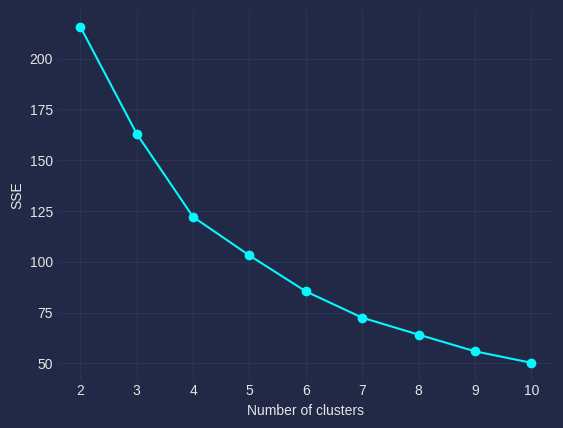

In [ ]:
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [8]:
optimal_k_2d = 4
kmeans = KMeans(n_clusters=optimal_k_2d, random_state=11)
kmeans.fit(df_2d_scaler)
labels = kmeans.labels_
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3,
       1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       1], dtype=int32)

In [9]:
kmeans

KMeans(n_clusters=4, random_state=11)

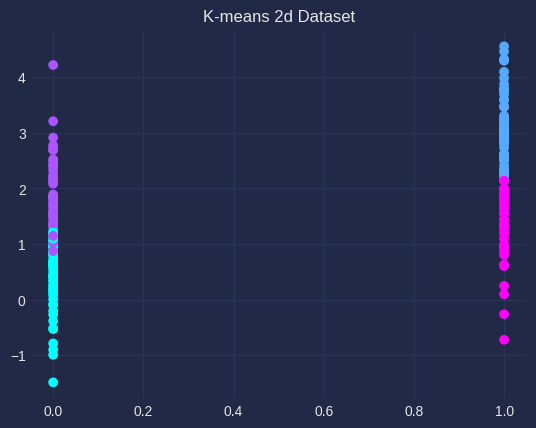

In [ ]:
plt.scatter(df_2d.values[:, 0], df_2d.values[:, 1], c=labels)
plt.title('K-means 2d Dataset')
plt.show()

In [10]:
see_mnist = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=11)
    kmeans.fit(df_mnist_scaler)
    see_mnist.append(kmeans.inertia_)
see_mnist

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

[272447.1578515961,
 263091.5046569917,
 255424.39493746392,
 249563.47701243826,
 243761.6697868233,
 239808.1445523338,
 236278.4080456373,
 233395.6095609403,
 227330.3515617103]

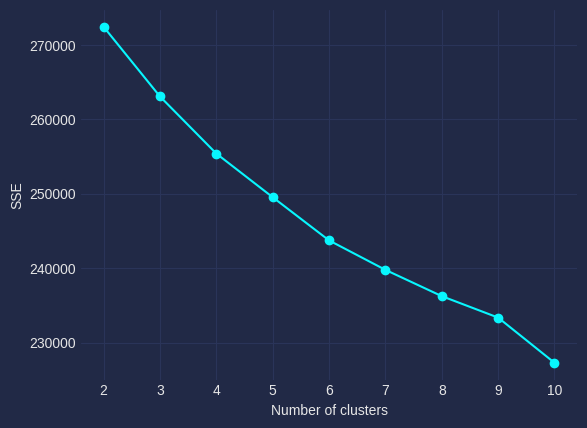

In [ ]:
plt.plot(range(2, 11), see_mnist, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [11]:
optimal_k_mnist = 6
kmeans = KMeans(n_clusters=optimal_k_mnist, random_state=11)
kmeans.fit(df_mnist_scaler)
labels_mnist = kmeans.labels_
labels_mnist

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 4, 3, 5, 4, 5, 5, 0, 0, 2, 3, 5, 2, 4, 2, 5, 5, 2, 5, 0, 3, 3,
       0, 5, 1, 5, 5, 2, 4, 0, 4, 2, 1, 0, 3, 5, 4, 2, 4, 4, 5, 5, 4, 4,
       0, 4, 3, 5, 5, 3, 2, 0, 2, 1, 2, 5, 4, 5, 4, 5, 3, 5, 3, 0, 4, 3,
       5, 2, 1, 5, 1, 3, 0, 4, 5, 2, 4, 4, 0, 5, 3, 3, 5, 0, 5, 4, 2, 3,
       4, 2, 3, 0, 0, 4, 5, 4, 4, 3, 5, 3, 2, 0, 5, 5, 5, 3, 4, 5, 5, 0,
       4, 4, 5, 4, 4, 5, 5, 5, 0, 2, 3, 5, 3, 5, 5, 1, 0, 0, 0, 3, 3, 2,
       5, 0, 4, 2, 4, 3, 0, 4, 5, 2, 4, 0, 4, 0, 3, 2, 4, 5, 5, 0, 2, 4,
       0, 3, 2, 2, 4, 5, 3, 0, 5, 3, 2, 5, 4, 4, 5, 5, 0, 2, 2, 3, 4, 4,
       0, 4, 2, 4, 2, 0, 1, 2, 5, 2, 2, 1, 4, 4, 4, 3, 5, 2, 4, 4, 3, 5,
       3, 3, 1, 4, 4, 4, 2, 5, 2, 3, 5, 5, 0, 5, 4, 5, 3, 0, 0, 0, 0, 5,
       2, 3, 0, 4, 2, 0, 4, 4, 4, 4, 4, 2, 0, 4, 5, 3, 3, 5, 4, 2, 2, 0,
       5, 4, 2, 1, 3, 5, 3, 5, 4, 5, 0, 5, 4, 3, 4, 3, 3, 0, 4, 5, 4, 5,
       4, 2, 4, 2, 1, 2, 2, 4, 5, 5, 5, 4, 0, 3, 4, 3, 5, 4, 0, 5, 3, 3,
       5, 4, 2, 5, 3, 5, 3, 2, 5, 1, 1, 3, 0, 4, 5,

In [12]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_mnist_scaler)
reduced_data

array([[ 4.85121493e+00, -1.23362784e+01],
       [-7.01686429e+00, -5.61227249e+00],
       [ 8.54235370e+00, -4.06114974e-01],
       [ 1.16534021e+00,  6.61437202e+00],
       [-7.66943134e+00, -5.34230229e+00],
       [-1.23716517e+00,  4.41980277e+00],
       [-3.49850756e+00,  5.04650536e+00],
       [ 3.73029050e+00,  6.84519337e-01],
       [-3.24184566e-01,  4.10281396e+00],
       [ 1.38221127e+01, -4.91682926e+00],
       [ 7.46089095e+00, -2.34956800e+00],
       [-4.57128370e+00,  6.68897800e+00],
       [ 9.08007887e+00,  1.90508274e+00],
       [-8.25412937e+00, -6.69881624e+00],
       [ 4.81175114e+00, -4.42545058e+00],
       [-6.80479650e-01,  8.99044313e+00],
       [-2.01169704e+00,  6.35119591e+00],
       [ 8.82703756e+00,  8.23155264e-02],
       [-3.36595759e+00,  5.39616621e+00],
       [-4.78023546e+00,  1.33625584e+00],
       [ 3.55169753e-01, -1.29894507e+00],
       [ 1.61832896e+00,  9.72468737e-01],
       [-2.88783538e+00, -2.66713782e+00],
       [-3.

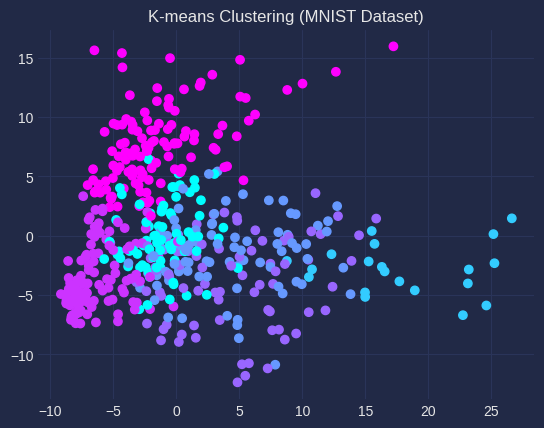

In [ ]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels_mnist)
plt.title('K-means Clustering (MNIST Dataset)')
plt.show()